# TS2Vec

In [2]:
# https://github.com/zhihanyue/ts2vec?tab=readme-ov-file
from ts2vec import TS2Vec
import numpy as np
import pandas as pd


# (Both train_data and test_data have a shape of n_instances x n_timestamps x n_features)
train_data = np.load("train_data.npy")
train_labels = np.load("train_labels.npy")
train_ds_mrns = np.load("train_ds_mrns.npy", allow_pickle=True)
test_data = np.load("test_data.npy")
test_labels = np.load("test_labels.npy")
test_ds_mrns = np.load("test_ds_mrns.npy", allow_pickle=True)

print(train_data.shape)
print(train_labels.shape)
print(train_ds_mrns.shape)
print(test_data.shape)
print(test_labels.shape)
print(test_ds_mrns.shape)

(55108, 4032, 1)
(55108,)
(55108, 2)
(13778, 4032, 1)
(13778,)
(13778, 2)


In [3]:
# Train a TS2Vec model
model = TS2Vec(
    input_dims=1,
    # device=0,
    device='cpu',
    output_dims=8,
    batch_size=11
)

# Was trained on V100 GPU
# loss_log = model.fit(
#     train_data,
#     verbose=True,
#     n_epochs=1 # also tested 2 epochs earlier; results were nearly identical
# )

# Save model
# model.save("model.pt")

### Compute instance-level representations for train and test sets

In [ ]:
# Load model
model.load("model.pt")

In [5]:
train_test_data = np.vstack([train_data, test_data])
train_test_data.shape

(68886, 4032, 1)

In [ ]:
train_test_mrn_ds = np.vstack([train_ds_mrns, test_ds_mrns])
train_test_mrn_ds = pd.DataFrame(train_test_mrn_ds, columns=['mrn','ds'])
train_test_mrn_ds

In [7]:
train_test_repr = model.encode(train_test_data, encoding_window='full_series')  # n_instances x output_dims
train_test_repr.shape

(68886, 8)

In [ ]:
# Repr df
rep_df = pd.DataFrame(train_test_repr, columns = [f'ts2vec_{i}' for i in range(8)])
rep_df = pd.concat([train_test_mrn_ds, rep_df], axis=1)
rep_df 

In [9]:
# rep_df.to_csv('rep_df.csv', index=False)

# T-SNE

In [10]:
train_test_labels =  np.concatenate([train_labels, test_labels])

In [11]:
from sklearn.manifold import TSNE
N_PLOT = 10000
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(train_test_repr[:N_PLOT])
plot_labels = train_test_labels[:N_PLOT]

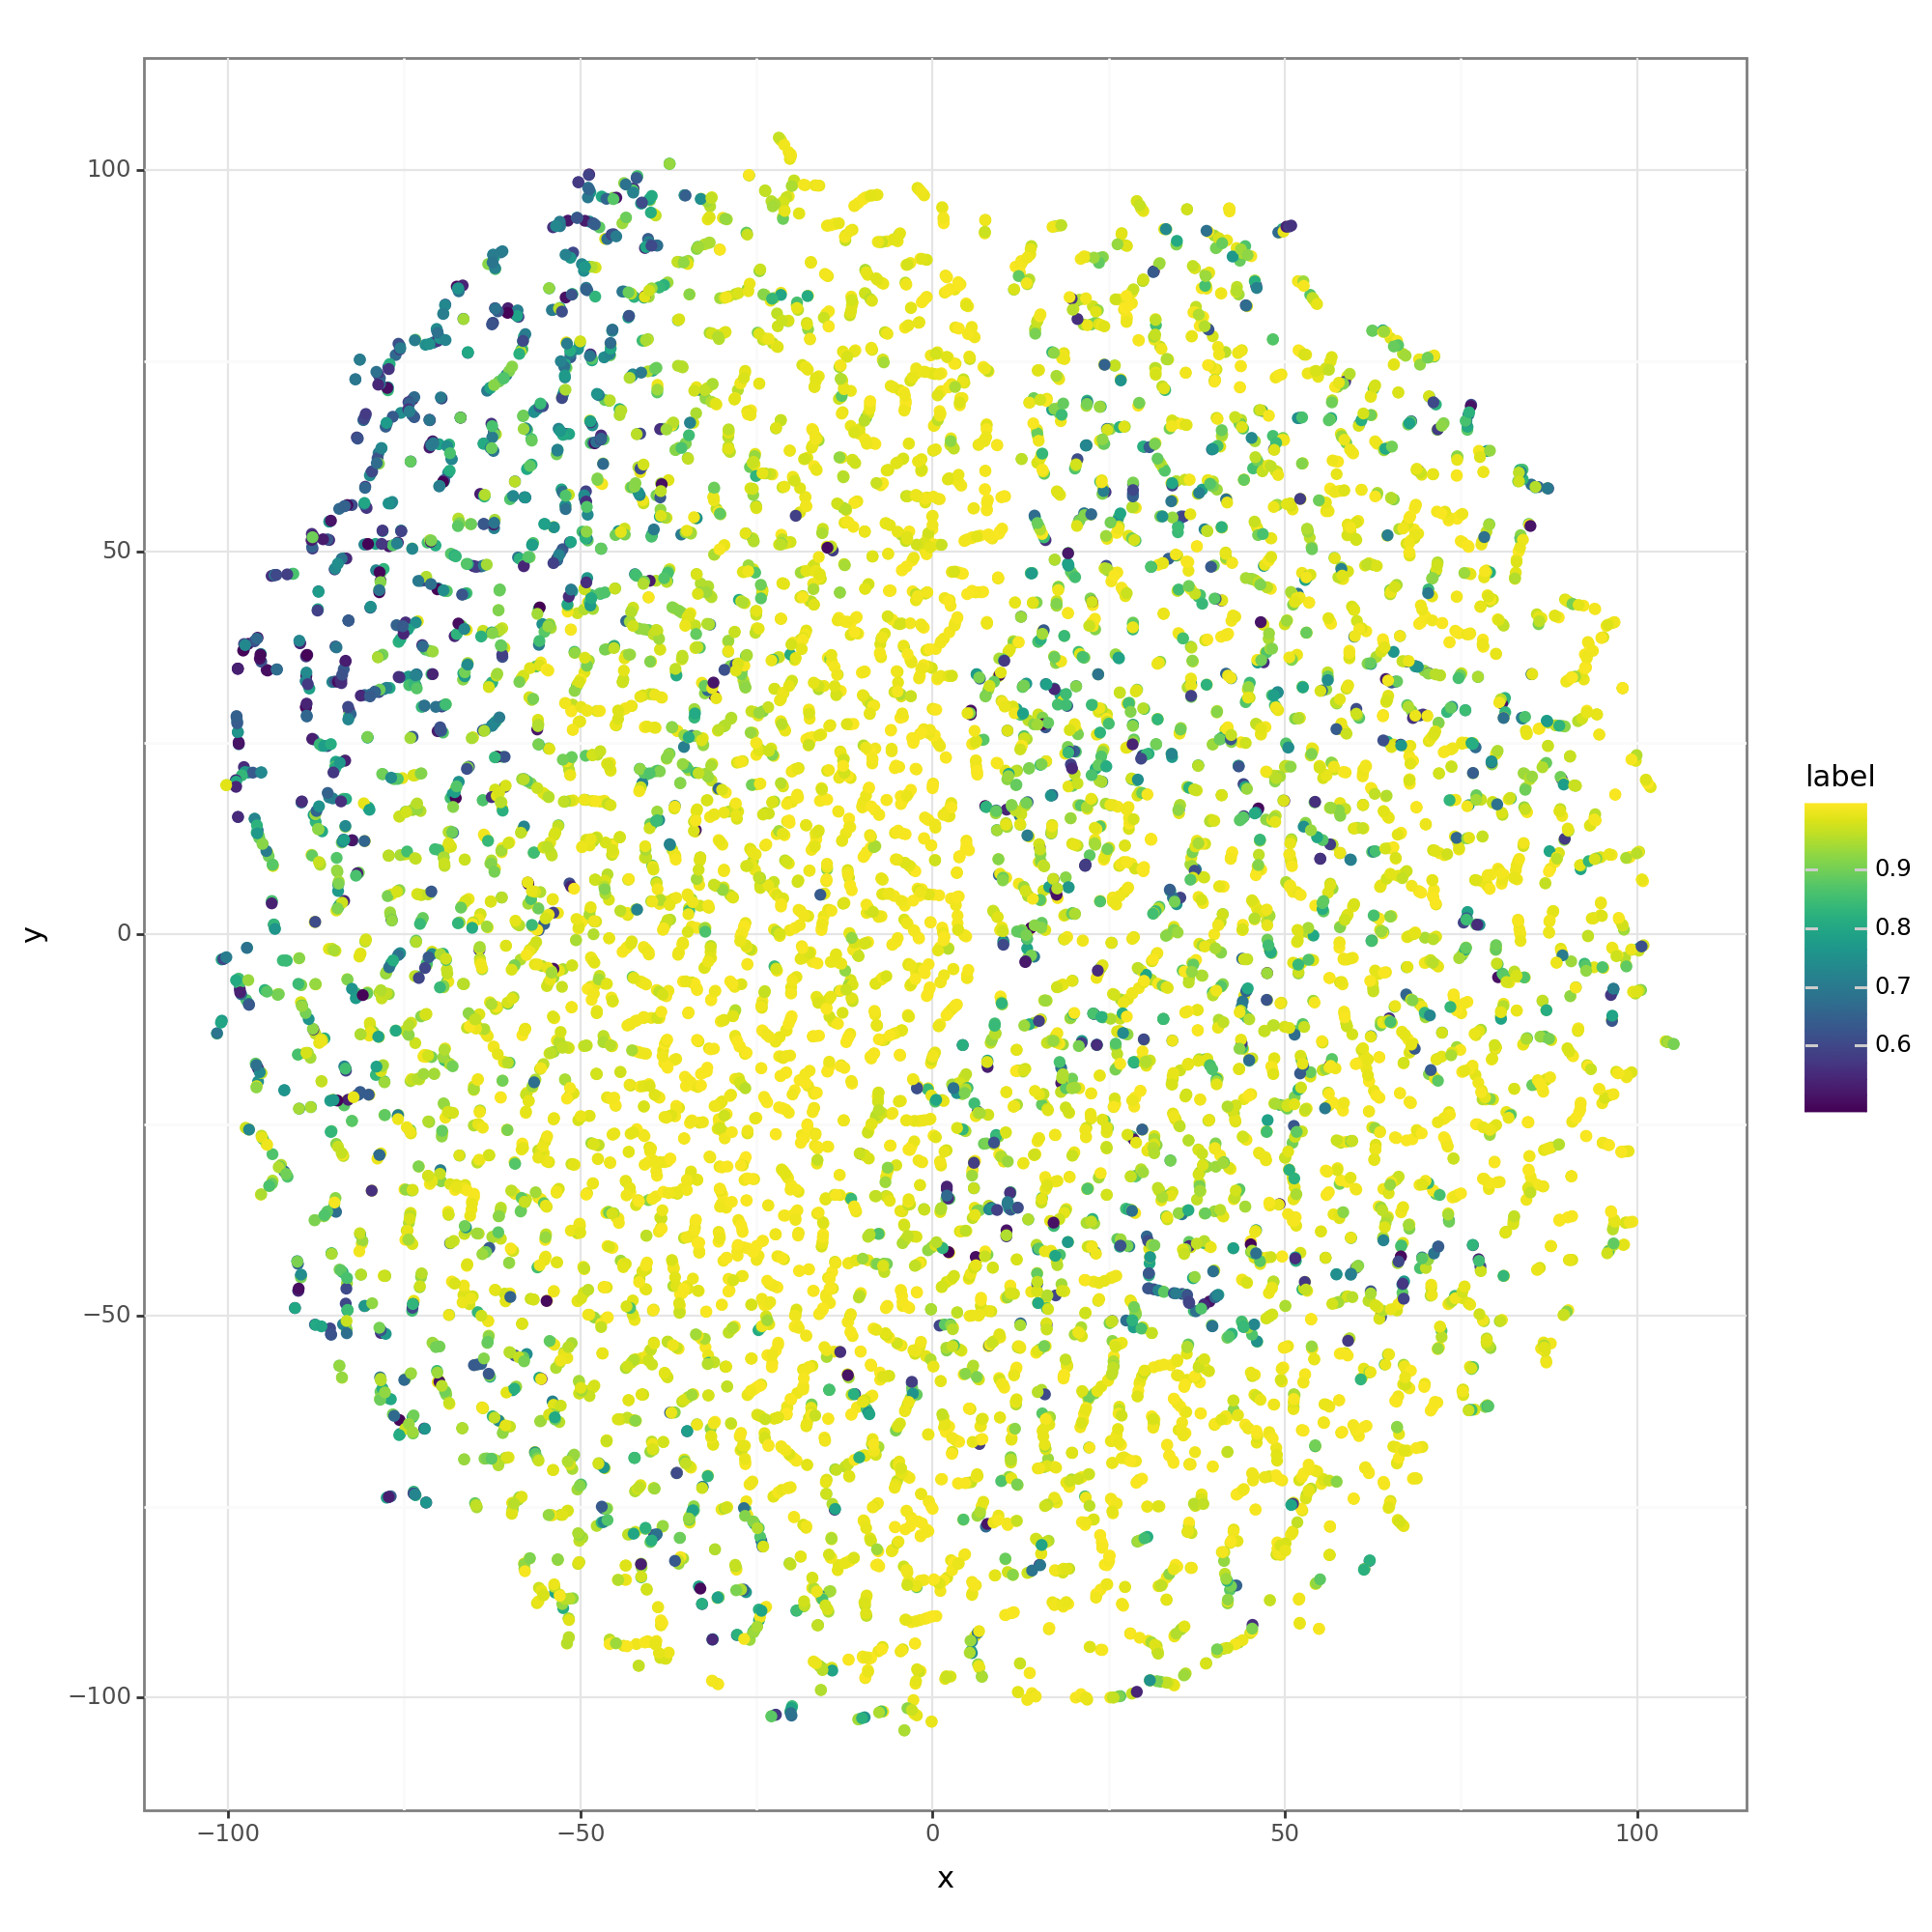

<Figure Size: (1000 x 1000)>

In [12]:
# plot T-SNE embeddings by label

import pandas as pd
import plotnine
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_bw

plotnine.options.figure_size = (10, 10)

df = pd.DataFrame({
    "x": X_embedded[:,0],
    "y": X_embedded[:,1],
    "label": plot_labels
})

(
    ggplot(df)  # What data to use
    + aes(x="x", y="y", color="label")
    + geom_point() + theme_bw()
)